##   Predicting delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("delivery_time.csv")

In [3]:
data.info()  ## No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


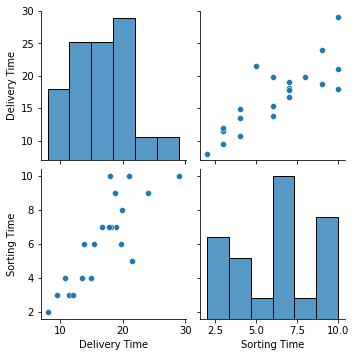

In [5]:
sns.pairplot(data)

In [3]:
data1 = data.rename({'Delivery Time': 'deliverytime', "Sorting Time" : 'sortingtime'}, axis = 1)


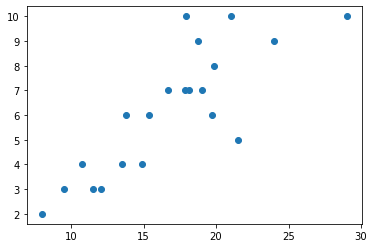

In [7]:
plt.scatter(data1.deliverytime, data1.sortingtime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

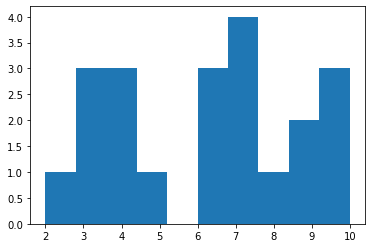

In [8]:
plt.hist(data1['sortingtime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18aa96d4970>,
 'caps': [<matplotlib.lines.Line2D at 0x18aa96e0070>,
 'boxes': [<matplotlib.lines.Line2D at 0x18aa96d4610>],
 'medians': [<matplotlib.lines.Line2D at 0x18aa96e0730>],
 'fliers': [<matplotlib.lines.Line2D at 0x18aa96e0a90>],
 'means': []}

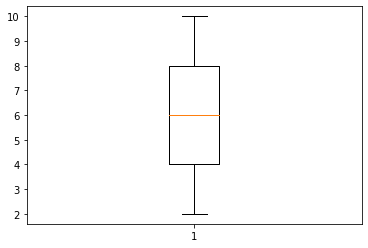

In [9]:
plt.boxplot(data1['sortingtime'])     ## No outliers

{'bodies': [<matplotlib.collections.PolyCollection at 0x18aa9731a90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x18aa97318e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x18aa9731940>,
 'cbars': <matplotlib.collections.LineCollection at 0x18aa9745280>}

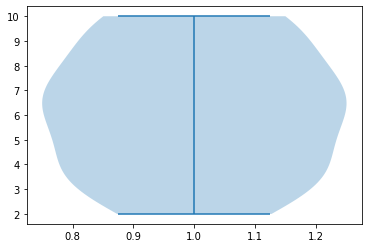

In [10]:
plt.violinplot(data1.sortingtime)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliverytime', ylabel='Density'>

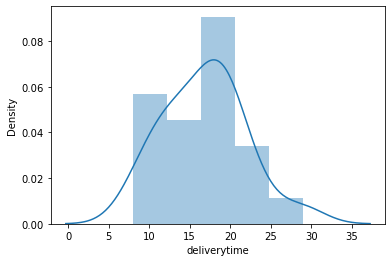

In [11]:
sns.distplot(data1.deliverytime)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

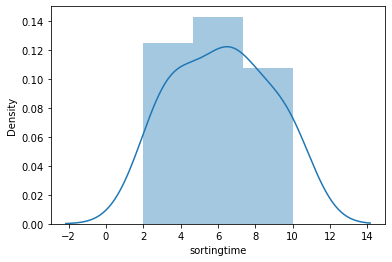

In [12]:
sns.distplot(data1.sortingtime)

In [13]:
data1.corr()   ##  82% correlation between sortingtime and deliverytime

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


In [14]:
## Basic model building
import statsmodels.formula.api as smf
modelbasic = smf.ols("deliverytime~sortingtime", data = data1).fit()
modelbasic.summary()  ## we got very low Rsqrd value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        18:46:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## applying log transformation

In [15]:
data1['log_sorting'] = np.log(data1.sortingtime)

In [16]:
model2 = smf.ols('deliverytime~log_sorting', data=data1).fit()
model2.summary()   ## after apply log transformation also Rsqrd is low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        18:46:21   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exponential Transformation

In [17]:
data1['log_delivery'] = np.log(data1.deliverytime)
data1

,deliverytime,sortingtime,log_sorting,log_delivery
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296
5,15.35,6,1.791759,2.731115
6,19.00,7,1.945910,2.944439
7,9.50,3,1.098612,2.251292
8,17.90,10,2.302585,2.884801
9,18.75,9,2.197225,2.931194


In [18]:
model3 = smf.ols("log_delivery~sortingtime", data = data1).fit()
model3.summary()  ## Rsqrd value some improved 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_delivery   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                        18:46:21   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sortingtime', ylabel='log_delivery'>

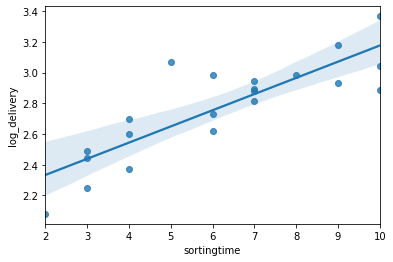

In [19]:
sns.regplot(x= 'sortingtime', y = 'log_delivery', data= data1)

In [4]:
data1['sortingsq'] = data1.sortingtime * data1.sortingtime
data1.head()

,deliverytime,sortingtime,sortingsq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [21]:
## Building model with quadratic equation for curvilinear curve

In [22]:
model4 = smf.ols('log_delivery~sortingtime+sortingsq', data = data1).fit() 

In [23]:
model4.summary()    ## Rsqrd improved more

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_delivery   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.20e-06
Time:                        18:46:23   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
sortingtime     0.2659      0.080      3.315      0.004       0.097       0.434
sortingsq      -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model4.rsquared

0.764866634295373

In [5]:
data1.head()

,deliverytime,sortingtime,sortingsq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [26]:
## Calculating RMSE 
def RMSE(actual, pred):
    return np.sqrt(np.mean((actual-pred)**2))

In [27]:
## Rmse for basic model
pred_modelbasic = modelbasic.predict(data1)
rmse_modelbasic = RMSE(data1.deliverytime, pred_modelbasic)
rmse_modelbasic

2.7916503270617654

In [28]:
## Rmse for model2
pred_model2 = model2.predict(data1)
rmse_model2 = RMSE(data1.deliverytime, pred_model2)
rmse_model2

2.733171476682066

In [29]:
## Rmse for model3
pred_model3 = model3.predict(data1)
rmse_model3 = RMSE(data1.deliverytime, pred_model3)
rmse_model3

14.795516941016686

In [30]:
## Rmse for model4
pred_model4 = np.exp(model4.predict(data1))
rmse_model4 = RMSE(data1.deliverytime, pred_model4)
rmse_model4

2.799041988740925

In [37]:
## Creating a RMSE table
df = {'model':['basic','log','exp','quad'],'Rmse':[rmse_modelbasic,rmse_model2, rmse_model3, rmse_model4],
     'Rsqrd': [modelbasic.rsquared, model2.rsquared, model3.rsquared, model4.rsquared]}
table = pd.DataFrame(df)
table

,model,Rmse,Rsqrd
0,basic,2.791650,0.682271
1,log,2.733171,0.695443
2,exp,14.795517,0.710948
3,quad,2.799042,0.764867


In [33]:
actual = np.exp(data1.deliverytime)
pred =  model4.predict()
pred 


array([3.07486324, 2.55794231, 2.8329741 , 3.05291276, 3.07486324,
       2.8329741 , 2.9319682 , 2.38190461, 3.07486324, 3.05291276,
       3.00528108, 2.55794231, 2.9319682 , 2.38190461, 2.38190461,
       2.55794231, 2.8329741 , 2.9319682 , 2.1801857 , 2.9319682 ,
       2.70829881])

In [34]:
errors = (actual - pred)
errors

0     1.318816e+09
1     7.294138e+05
2     3.778470e+08
3     2.648912e+10
4     3.931334e+12
5     4.638954e+06
6     1.784823e+08
7     1.335734e+04
8     5.941159e+07
9     1.390022e+08
10    4.093168e+08
11    4.662747e+04
12    1.754009e+07
13    9.871339e+04
14    1.677090e+05
15    2.899356e+06
16    9.365863e+05
17    7.329478e+07
18    2.978778e+03
19    5.539500e+07
20    2.174360e+09
Name: deliverytime, dtype: float64

In [40]:
## Prediction for new data 
newdata = pd.Series([3,4,7,9])
newdata

0    3
1    4
2    7
3    9
dtype: int64

In [42]:
data_pred = pd.DataFrame(newdata, columns=['sortingtime'])
data_pred['sortingsq'] = data_pred.sortingtime * data_pred.sortingtime
data_pred

,sortingtime,sortingsq
0,3,9
1,4,16
2,7,49
3,9,81


In [45]:
data_pred['pred_delivery'] = np.exp(model4.predict(data_pred))
data_pred

,sortingtime,sortingsq,pred_delivery
0,3,9,10.825502
1,4,16,12.909227
2,7,49,18.764526
3,9,81,21.176938
